In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)


In [3]:
#import the 'application data' dataset 
app_data= pd.read_csv("application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# general sanity check for the data set
print(app_data.shape)
app_data.describe()

(307511, 122)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
# Checking info of data frame
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Checking for unique values in each column of data set
for col in app_data.columns:
    print(col, '####' , app_data[col].unique())

SK_ID_CURR #### [100002 100003 100004 ... 456253 456254 456255]
TARGET #### [1 0]
NAME_CONTRACT_TYPE #### ['Cash loans' 'Revolving loans']
CODE_GENDER #### ['M' 'F' 'XNA']
FLAG_OWN_CAR #### ['N' 'Y']
FLAG_OWN_REALTY #### ['Y' 'N']
CNT_CHILDREN #### [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL #### [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT #### [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY #### [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE #### [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE #### ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE #### ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE #### ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Acad

LIVINGAREA_AVG #### [0.019  0.0549    nan ... 0.4256 0.6005 0.9279]
NONLIVINGAPARTMENTS_AVG #### [0.000e+00 3.900e-03       nan 1.930e-02 7.700e-03 1.900e-03 6.560e-02
 5.800e-03 2.780e-01 2.320e-02 7.720e-02 1.931e-01 3.860e-02 1.540e-02
 2.201e-01 1.160e-02 2.700e-02 1.622e-01 3.090e-02 4.250e-02 6.180e-02
 5.020e-02 1.740e-02 2.900e-02 2.100e-03 1.300e-03 6.900e-03 1.350e-02
 4.100e-03 1.500e-03 1.274e-01 5.790e-02 2.625e-01 8.000e-04 1.969e-01
 4.830e-02 4.630e-02 4.440e-02 1.030e-02 5.660e-02 2.830e-02 1.158e-01
 3.470e-02 8.110e-02 7.340e-02 7.452e-01 1.236e-01 2.500e-03 1.506e-01
 1.000e+00 6.400e-03 9.270e-02 4.890e-02 1.100e-03 1.429e-01 8.690e-02
 1.400e-03 5.410e-02 2.080e-02 1.410e-02 2.278e-01 7.000e-04 1.000e-03
 6.950e-02 2.200e-03 8.880e-02 2.220e-02 2.900e-03 1.000e-02 1.197e-01
 1.029e-01 9.700e-03 2.046e-01 1.081e-01 1.390e-01 2.317e-01 2.700e-03
 3.822e-01 3.000e-04 8.490e-02 5.100e-03 1.610e-02 2.857e-01 1.313e-01
 5.500e-03 9.000e-03 2.510e-02 2.120e-02 3.629e-01 

BASEMENTAREA_MODE #### [0.0383 0.0538    nan ... 0.2843 0.5461 0.2808]
YEARS_BEGINEXPLUATATION_MODE #### [9.722e-01 9.851e-01       nan 9.811e-01 9.806e-01 9.985e-01 9.881e-01
 9.782e-01 9.786e-01 9.876e-01 9.861e-01 9.732e-01 9.831e-01 9.697e-01
 9.901e-01 9.801e-01 9.762e-01 9.960e-01 9.980e-01 9.846e-01 9.886e-01
 9.136e-01 9.841e-01 9.856e-01 9.955e-01 9.677e-01 9.891e-01 9.752e-01
 9.826e-01 9.727e-01 0.000e+00 9.578e-01 9.742e-01 9.707e-01 9.975e-01
 9.990e-01 9.816e-01 9.866e-01 9.836e-01 9.940e-01 9.757e-01 9.737e-01
 9.791e-01 9.821e-01 9.682e-01 9.926e-01 9.772e-01 9.945e-01 9.747e-01
 9.777e-01 9.796e-01 9.896e-01 9.692e-01 9.518e-01 9.950e-01 9.995e-01
 9.414e-01 9.930e-01 9.702e-01 9.921e-01 9.916e-01 9.712e-01 9.871e-01
 9.672e-01 9.911e-01 9.717e-01 9.608e-01 9.906e-01 9.503e-01 9.598e-01
 9.970e-01 9.583e-01 9.767e-01 9.290e-01 9.935e-01 9.618e-01 9.563e-01
 9.965e-01 9.508e-01 9.652e-01 9.687e-01 9.667e-01 9.359e-01 9.573e-01
 9.588e-01 9.513e-01 9.643e-01 1.000e+00 9.

COMMONAREA_MEDI #### [0.0144 0.0608    nan ... 0.1631 0.124  0.1648]
ELEVATORS_MEDI #### [0.   0.08  nan 0.16 0.4  0.14 0.28 0.04 0.24 0.88 0.32 0.12 0.36 0.68
 0.56 0.6  0.2  0.52 0.1  0.44 0.22 0.02 0.48 0.64 0.18 0.06 0.72 0.74
 0.9  0.5  0.42 1.   0.54 0.76 0.3  0.26 0.34 0.84 0.58 0.96 0.38 0.8
 0.92 0.78 0.66 0.46 0.62]
ENTRANCES_MEDI #### [0.069  0.0345    nan 0.2069 0.1379 0.1724 0.1034 0.1207 0.3103 0.4828
 0.3793 0.3448 0.2759 0.2414 0.1552 0.4483 0.0517 0.5172 0.1897 0.0862
 0.     0.4138 0.5517 0.2586 0.6207 0.6897 0.431  0.6552 0.5862 0.3276
 0.2241 0.7931 0.3621 0.8276 0.7586 0.4655 0.8621 0.7241 1.     0.2931
 0.8966 0.9655 0.5    0.931  0.569  0.3966 0.0172]
FLOORSMAX_MEDI #### [0.0833 0.2917    nan 0.1667 0.3333 0.6667 0.375  0.0417 0.25   0.4583
 0.2083 0.125  0.     0.5833 0.625  0.9167 0.9583 0.1875 0.5417 0.4792
 0.5    1.     0.4167 0.1042 0.2708 0.1458 0.4375 0.5208 0.875  0.2292
 0.7083 0.0208 0.3958 0.3542 0.6042 0.7292 0.8125 0.75   0.0625 0.5625
 0.3125 0.791

In [7]:
#replace XNA with nan value 
app_data = app_data.replace('XNA',np.NAN)


In [8]:
# check the percentage of missing values in the data set
null_count = (app_data.isnull().sum()/len(app_data)*100)
null_count

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.001301
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
# check the columns having null values more than 40%
null_count1 = null_count[null_count.values >=40]
null_count1

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [10]:
# drop the columns which have missing values more than or equal to the 40%
col_drop1 = list (null_count1.index.values)
app_data.drop(labels = col_drop1,axis=1,inplace = True)
app_data.shape

(307511, 73)

In [11]:
# Checking remaining null values in data set
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.001301
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### As per above analysis column having name as follows AMT_ANNUITY , AMT_GOODS_PRICE, NAME_TYPE_SUITE , EXT_SOURCE_2, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE  having null values less than 1%, so drop these rows

In [12]:
# Eliminating rows having null value
app_data=app_data[~(app_data.AMT_ANNUITY.isnull())] 
app_data=app_data[~(app_data.CODE_GENDER.isnull())]
app_data=app_data[~(app_data.AMT_GOODS_PRICE.isnull())] 
app_data=app_data[~(app_data.NAME_TYPE_SUITE.isnull())] 
app_data=app_data[~(app_data.EXT_SOURCE_2.isnull())] 
app_data=app_data[~(app_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull())] 
app_data=app_data[~(app_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull())] 
app_data=app_data[~(app_data. OBS_60_CNT_SOCIAL_CIRCLE.isnull())] 
app_data=app_data[~(app_data.DEF_60_CNT_SOCIAL_CIRCLE.isnull())] 
app_data=app_data[~(app_data.DAYS_LAST_PHONE_CHANGE.isnull())] 

In [13]:
# dropping the columns which are not useful for analysis

dcol = ['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']
app_data.drop(dcol, axis=1, inplace= True)
app_data.shape

(304527, 39)

In [14]:
#checking reamaining null values in dataset
app_data.isnull().sum()/len(app_data)*100 

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.338108
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REG_REGION_NOT_L

In [15]:
# imputing null values for categorical numeric column with mode value 
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0], inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0], inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0], inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0], inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace=True)
app_data.EXT_SOURCE_3.fillna(app_data.EXT_SOURCE_3.mean(), inplace=True)

In [16]:
## Checking remaining null values in data set after filling null values
app_data.isnull().sum()/len(app_data)*100 

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.338108
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REG_REGION_NOT_L

In [17]:
#### keep null value of 'OCCUPATION_TYPE' and 'ORGANIZATION_TYPE' as it is as it has more than 30% null value and it will play an important role in analysis
## let's suppose if we drop those rows then it will affect our data set and hence it will affect analysis
## also let's suppose if we impute those null value with mode value. what if those missing values are defaulter then we cannot say that mose value is defaulter as we don't know the exact case.   

In [18]:
# check for days data columns having -ve value
app_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].describe()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,304527.000000,304527.000000,304527.000000,304527.000000
mean,-16040.542481,63832.124583,-4986.698950,-2994.731367
std,4361.972393,141291.861354,3521.597752,1509.378102
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2762.000000,-7478.000000,-4299.000000
50%,-15755.000000,-1215.000000,-4505.000000,-3255.000000
75%,-12418.000000,-290.000000,-2012.000000,-1721.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [19]:
### Convert -ve values from data set to +ve values
app_data ["DAYS_BIRTH"] = app_data ["DAYS_BIRTH"].abs()
app_data ["DAYS_EMPLOYED"] = app_data ["DAYS_EMPLOYED"].abs()
app_data ["DAYS_REGISTRATION"] = app_data ["DAYS_REGISTRATION"].abs()
app_data ["DAYS_ID_PUBLISH"] = app_data ["DAYS_ID_PUBLISH"].abs()

In [20]:
# change the data type of CNT_FAM_MEMBERS from float to int
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype("int64")

In [21]:
# Checking for unique values n each column of data set
for col in app_data.columns:
    print(col, '####' , app_data[col].unique())

SK_ID_CURR #### [100002 100003 100004 ... 456253 456254 456255]
TARGET #### [1 0]
NAME_CONTRACT_TYPE #### ['Cash loans' 'Revolving loans']
CODE_GENDER #### ['M' 'F']
FLAG_OWN_CAR #### ['N' 'Y']
FLAG_OWN_REALTY #### ['Y' 'N']
CNT_CHILDREN #### [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL #### [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT #### [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY #### [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE #### [ 351000.  1129500.   135000.   297000.   513000.   454500.  1395000.
 1530000.   913500.   405000.   652500.    67500.   697500.   679500.
  247500.   387000.   270000.   157500.   427500.   927000.   450000.
  225000.   702000.   675000.   180000.   477000.   360000.  1125000.
  553500.   540000.   855000.   238500.   598500.   252000.  1350000.
  666000.   202500.   517500.  1588500.  1080000.   810000.    90000.
  900000.  1035000.   463500.   45

NAME_INCOME_TYPE #### ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE #### ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS #### ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE #### ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
DAYS_BIRTH #### [ 9461 16765 19046 ...  7951  7857 25061]
DAYS_EMPLOYED #### [  637  1188   225 ... 12971 11084  8694]
DAYS_REGISTRATION #### [ 3648.  1186.  4260. ... 16396. 14558. 14798.]
DAYS_ID_PUBLISH #### [2120  291 2531 ... 6194 5854 6211]
OCCUPATION_TYPE #### ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'L

In [22]:
## Checking for outliers in numeric continuous columns thoritically
app_data[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','EXT_SOURCE_2', 'EXT_SOURCE_3']].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3
count,304527.000000,3.045270e+05,3.045270e+05,304527.000000,3.045270e+05,304527.000000,304527.000000,304527.000000,304527.000000,3.045270e+05,304527.000000
mean,0.417135,1.686632e+05,5.995619e+05,27146.463934,5.384965e+05,16040.542481,67744.445218,4986.698950,2994.731367,5.142194e-01,0.510768
std,0.722305,2.378925e+05,4.021472e+05,14480.165991,3.690532e+05,4361.972393,139458.304397,3521.597752,1509.378102,1.911248e-01,0.174506
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,7489.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527
25%,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,12418.000000,934.000000,2012.000000,1721.000000,3.921081e-01,0.417100
50%,0.000000,1.474470e+05,5.172660e+05,24939.000000,4.500000e+05,15755.000000,2221.000000,4505.000000,3255.000000,5.658110e-01,0.510768
75%,1.000000,2.025000e+05,8.086500e+05,34643.250000,6.795000e+05,19682.000000,5713.500000,7478.000000,4299.000000,6.635463e-01,0.636376
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,25229.000000,365243.000000,24672.000000,7197.000000,8.549997e-01,0.896010


CNT_CHILDREN


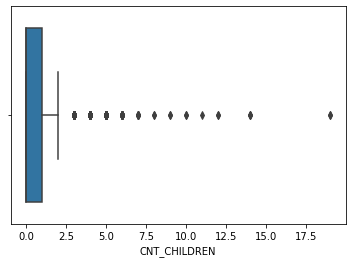

AMT_INCOME_TOTAL


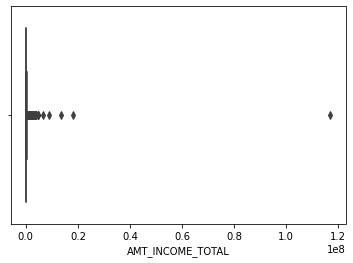

AMT_CREDIT


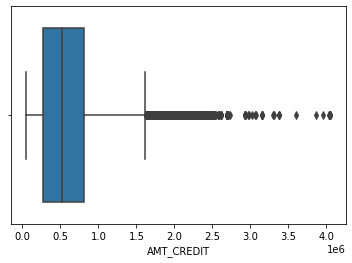

AMT_ANNUITY


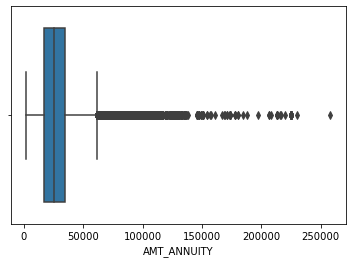

AMT_GOODS_PRICE


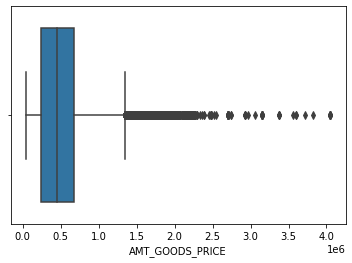

DAYS_EMPLOYED


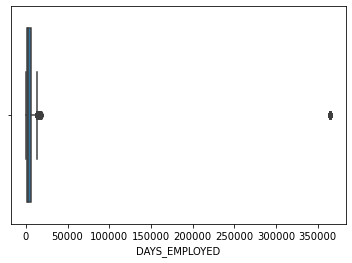

DAYS_REGISTRATION


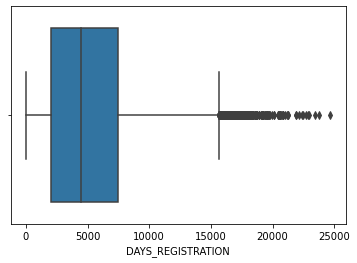

DAYS_ID_PUBLISH


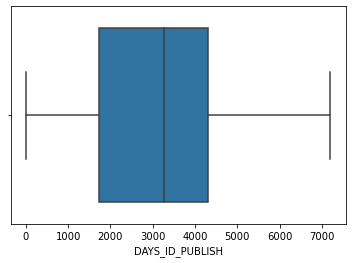

EXT_SOURCE_2


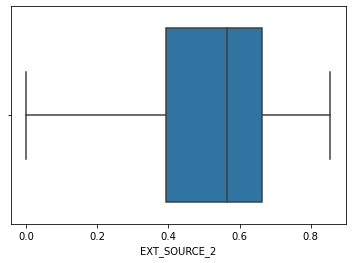

EXT_SOURCE_3


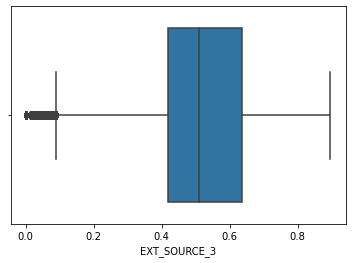

AMT_REQ_CREDIT_BUREAU_HOUR


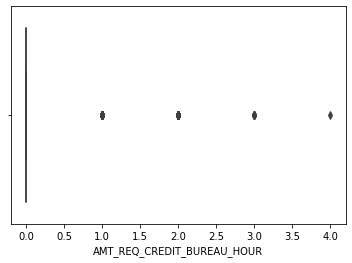

AMT_REQ_CREDIT_BUREAU_DAY


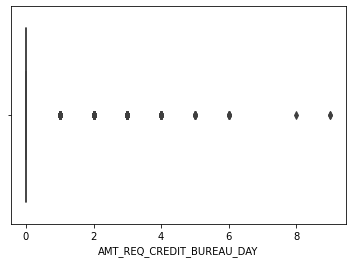

AMT_REQ_CREDIT_BUREAU_WEEK


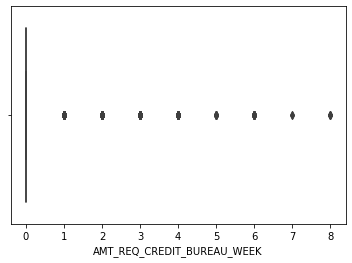

AMT_REQ_CREDIT_BUREAU_MON


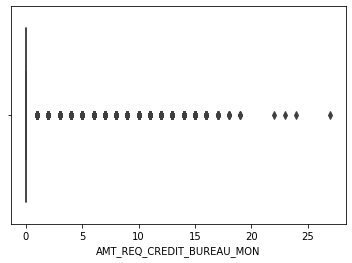

AMT_REQ_CREDIT_BUREAU_QRT


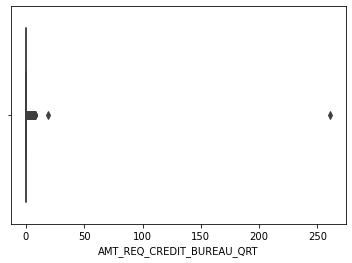

AMT_REQ_CREDIT_BUREAU_YEAR


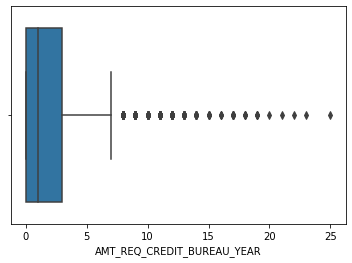

In [23]:
## Checking for outliers in numeric continuous columns by using box plot 
cont=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','EXT_SOURCE_2', 'EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']


for i in cont:
    print(i)
    sns.boxplot(app_data[i])
    plt.show()



In [24]:
## handelling of outliers by using IQR method in 'CNT_CHILDREN' column
q3, q1 = np.percentile(app_data.CNT_CHILDREN, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
app_data.CNT_CHILDREN= app_data.CNT_CHILDREN[app_data.CNT_CHILDREN< upper_bound]
app_data.CNT_CHILDREN= app_data.CNT_CHILDREN[app_data.CNT_CHILDREN > lower_bound]

In [25]:
## handelling of outliers by using IQR method in 'AMT_INCOME_TOTAL' column
q3, q1 = np.percentile(app_data.AMT_INCOME_TOTAL, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
app_data.AMT_INCOME_TOTAL= app_data.AMT_INCOME_TOTAL[app_data.AMT_INCOME_TOTAL< upper_bound]
app_data.AMT_INCOME_TOTAL= app_data.AMT_INCOME_TOTAL[app_data.AMT_INCOME_TOTAL > lower_bound]

In [26]:
## handelling of outliers by using IQR method in 'AMT_CREDIT' column
q3, q1 = np.percentile(app_data.AMT_CREDIT, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
app_data.AMT_CREDIT= app_data.AMT_CREDIT[app_data.AMT_CREDIT< upper_bound]
app_data.AMT_CREDIT= app_data.AMT_CREDIT[app_data.AMT_CREDIT > lower_bound]

In [27]:
## handelling of outliers by using IQR method in 'AMT_ANNUITY' column
q3, q1 = np.percentile(app_data.AMT_ANNUITY, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
app_data.AMT_ANNUITY= app_data.AMT_ANNUITY[app_data.AMT_ANNUITY< upper_bound]
app_data.AMT_ANNUITY= app_data.AMT_ANNUITY[app_data.AMT_ANNUITY > lower_bound]

In [28]:
## handelling of outliers by using IQR method in 'AMT_GOODS_PRICE' column
q3, q1 = np.percentile(app_data.AMT_GOODS_PRICE, [75, 25]) 
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
app_data.AMT_GOODS_PRICE= app_data.AMT_GOODS_PRICE[app_data.AMT_GOODS_PRICE< upper_bound]
app_data.AMT_GOODS_PRICE= app_data.AMT_GOODS_PRICE[app_data.AMT_GOODS_PRICE > lower_bound]

In [29]:
## handelling of outliers by using IQR method in 'DAYS_EMPLOYED' column
q3, q1 = np.percentile(app_data.DAYS_EMPLOYED, [75, 25]) 
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
app_data.DAYS_EMPLOYED= app_data.DAYS_EMPLOYED[app_data.DAYS_EMPLOYED< upper_bound]
app_data.DAYS_EMPLOYED= app_data.DAYS_EMPLOYED[app_data.DAYS_EMPLOYED > lower_bound]

In [30]:
## handelling of outliers by using IQR method in 'DAYS_REGISTRATION' column
q3, q1 = np.percentile(app_data.DAYS_REGISTRATION, [75, 25]) 
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
app_data.DAYS_REGISTRATION= app_data.DAYS_REGISTRATION[app_data.DAYS_REGISTRATION< upper_bound]
app_data.DAYS_REGISTRATION= app_data.DAYS_REGISTRATION[app_data.DAYS_REGISTRATION > lower_bound]

In [31]:
## handelling of outliers by using IQR method in 'EXT_SOURCE_3' column
q3, q1 = np.percentile(app_data.EXT_SOURCE_3, [75, 25]) 
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
app_data.EXT_SOURCE_3= app_data.EXT_SOURCE_3[app_data.EXT_SOURCE_3< upper_bound]
app_data.EXT_SOURCE_3= app_data.EXT_SOURCE_3[app_data.EXT_SOURCE_3 > lower_bound]

CNT_CHILDREN


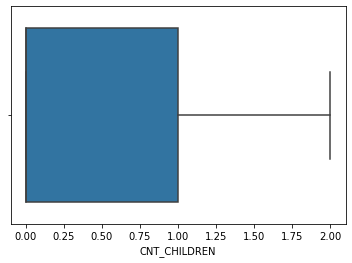

AMT_INCOME_TOTAL


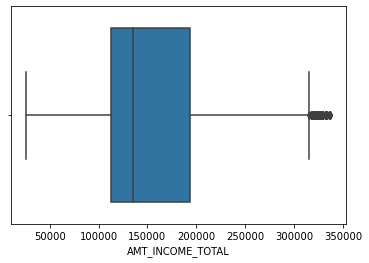

AMT_CREDIT


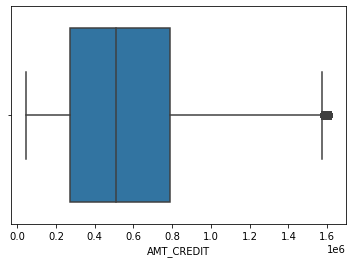

AMT_ANNUITY


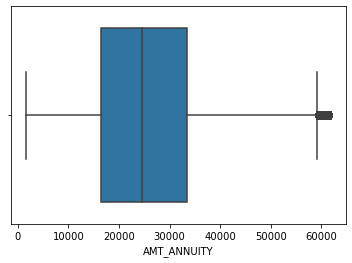

AMT_GOODS_PRICE


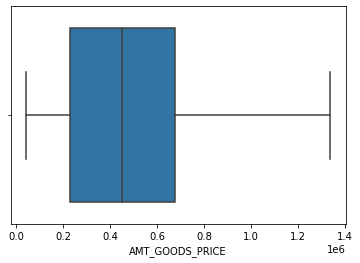

DAYS_EMPLOYED


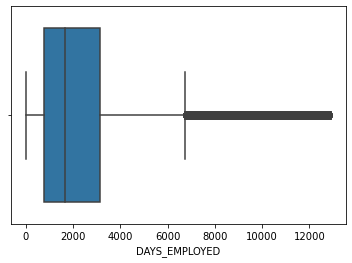

DAYS_REGISTRATION


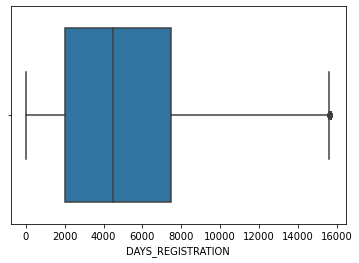

EXT_SOURCE_3


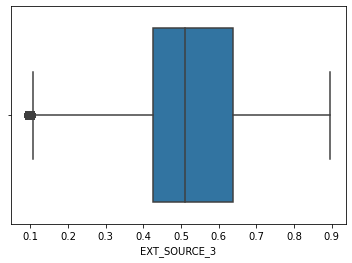

In [32]:
# Checking for outliers after outlier handelling by using bar plot
cont=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'EXT_SOURCE_3']


for i in cont:
    print(i)
    sns.boxplot(app_data[i])
    plt.show()



In [33]:
# Theoritically Checking for outliers after outlier handelling 
app_data[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'EXT_SOURCE_3']].describe()


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,EXT_SOURCE_3
count,300295.000000,288969.000000,2.980460e+05,297176.000000,2.899610e+05,248717.000000,303870.000000,300247.000000
mean,0.378032,153158.476523,5.706542e+05,25973.519724,4.872705e+05,2340.953956,4960.967019,0.517321
std,0.641580,62571.574290,3.527415e+05,12228.748233,2.905890e+05,2227.829299,3481.019086,0.166788
min,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.000000,0.000000,0.088461
25%,0.000000,112500.000000,2.700000e+05,16416.000000,2.295000e+05,765.000000,2006.000000,0.425893
50%,0.000000,135000.000000,5.084955e+05,24561.000000,4.500000e+05,1642.000000,4495.000000,0.510768
75%,1.000000,193500.000000,7.908300e+05,33484.500000,6.750000e+05,3153.000000,7453.000000,0.638044
max,2.000000,337050.000000,1.616278e+06,61740.000000,1.336500e+06,12882.000000,15674.000000,0.896010


### Binning different variables to better understanding

In [34]:
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

In [35]:
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']
app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [36]:
app_data['DAYS_BIRTH']= (app_data['DAYS_BIRTH']/365).astype(int)
app_data['DAYS_BIRTH_BINS']=pd.cut(app_data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Teen','Adult', 'Middle Age', 'Senior Citizen'])

### ANALYSIS

In [37]:
# check data inbalance in target column
(app_data.TARGET.value_counts())/ (len(app_data))*100

0    91.899897
1     8.100103
Name: TARGET, dtype: float64

from above output we can clearly conclude that the 'TARGET VARIABLE'  column has 91.92% of 0s  and 08.07% of 1s. Hence, we can conclude that 91.92% of peoples make payments on time and only 8.02% face challenges.

In [38]:
# 2 datasets are of target=1(client with payment difficulties) and target=0(all other)
target1 = app_data[app_data['TARGET']==1]
target0 = app_data[app_data['TARGET']==0]

In [39]:
#Check for target0 in the dataframe
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,225.0,4260.0,2531,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle Age
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,3039.0,9833.0,2437,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle Age
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,3038.0,4311.0,3458,Core staff,1,2,2,THURSDAY,0,0,0,0,1,1,Religion,0.322738,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,Middle Age
5,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,46,1588.0,4970.0,477,Laborers,2,2,2,WEDNESDAY,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,1.0,1.0,Medium,Low,Middle Age


In [40]:
#Check for target1 in the dataframe
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,637.0,3648.0,2120,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,Teen
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,51,2628.0,6573.0,1827,Cooking staff,1,3,2,MONDAY,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.0,0.0,0.0,0.0,2.0,2.0,High,Low,Middle Age
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,47,1262.0,1182.0,1029,Laborers,2,2,2,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,2.0,0.0,4.0,High,Medium,Middle Age
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,36,3597.0,45.0,4409,Sales staff,2,3,3,THURSDAY,0,0,0,0,0,0,Self-employed,0.674203,0.399676,0.0,0.0,0.0,0.0,0.0,2.0,Low,Low,Middle Age
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,67,NaN,5391.0,4199,NaN,2,2,2,THURSDAY,0,0,0,0,0,0,NaN,0.023952,0.720944,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Senior Citizen


#### UNIVARIATE ANALYSIS for numeric variables

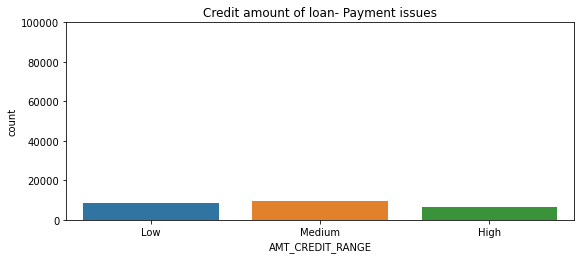

In [41]:
#for payment difficulties
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target1['AMT_CREDIT_RANGE'])
plt.show()
 

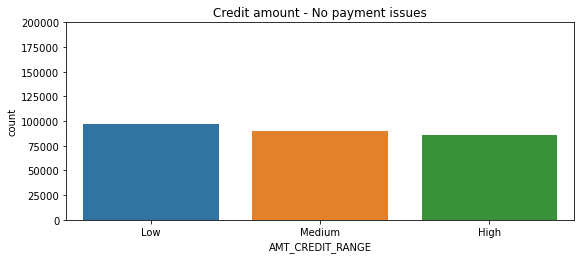

In [42]:
# For non-payment difficulties
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,200000)
plt.title('Credit amount - No payment issues')
sns.countplot(target0['AMT_CREDIT_RANGE'])
plt.show()

#### Conclusion - Customers who have low credit amount are more likely to pay back the loan

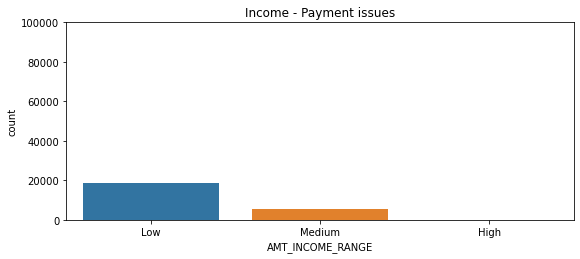

In [43]:
# For payment issues
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 2)
plt.title('Income - Payment issues')
plt.ylim(0,100000)
sns.countplot(target1['AMT_INCOME_RANGE'])
plt.show()

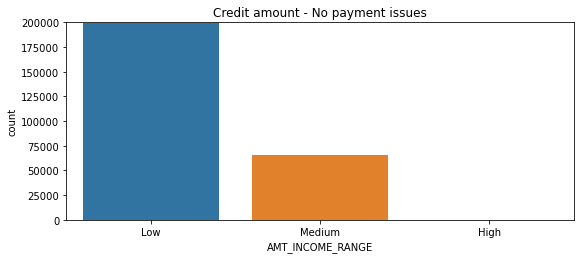

In [44]:
# For non-payment difficulties
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,200000)
plt.title('Credit amount - No payment issues')
sns.countplot(target0['AMT_INCOME_RANGE'])
plt.show()

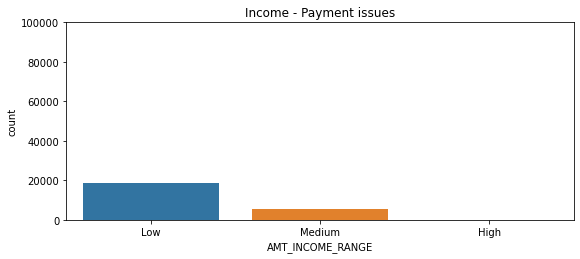

In [45]:
# For payment issues
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 2)
plt.title('Income - Payment issues')
plt.ylim(0,100000)
sns.countplot(target1['AMT_INCOME_RANGE'])
plt.show()

#### Conclusion - As compared to the other categories, clients having low income are more likely to repay the loan.

###  Univariate analysis - Categorical variables 

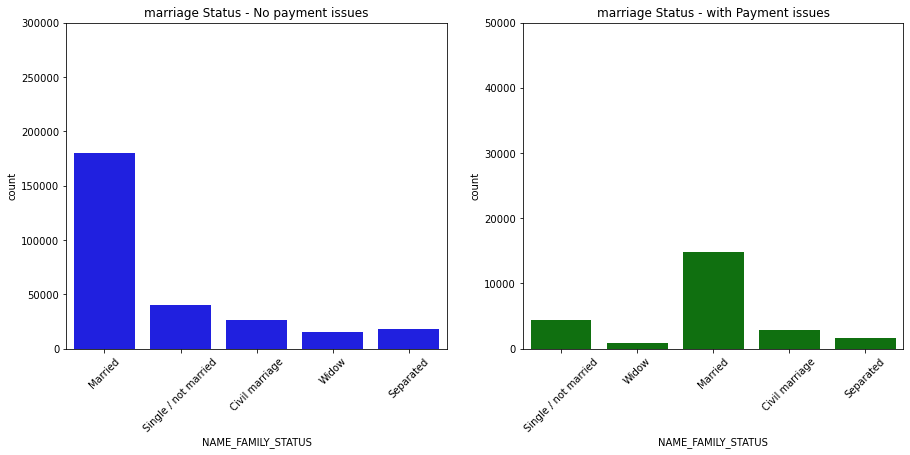

In [46]:
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)

sns.countplot(target0['NAME_FAMILY_STATUS'],color="blue")
plt.title('marriage Status - No payment issues')
plt.ylim(0,300000)
plt.xticks(rotation = 45)

# For payment issues
plt.subplot(1, 2, 2)

sns.countplot(target1['NAME_FAMILY_STATUS'],color="green")
plt.title('marriage Status - with Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 45)
plt.show()

#### Conclusion - from above output we can conclude that Widows are the least likely category to repay while Married category is most likely to repay the loan amount.

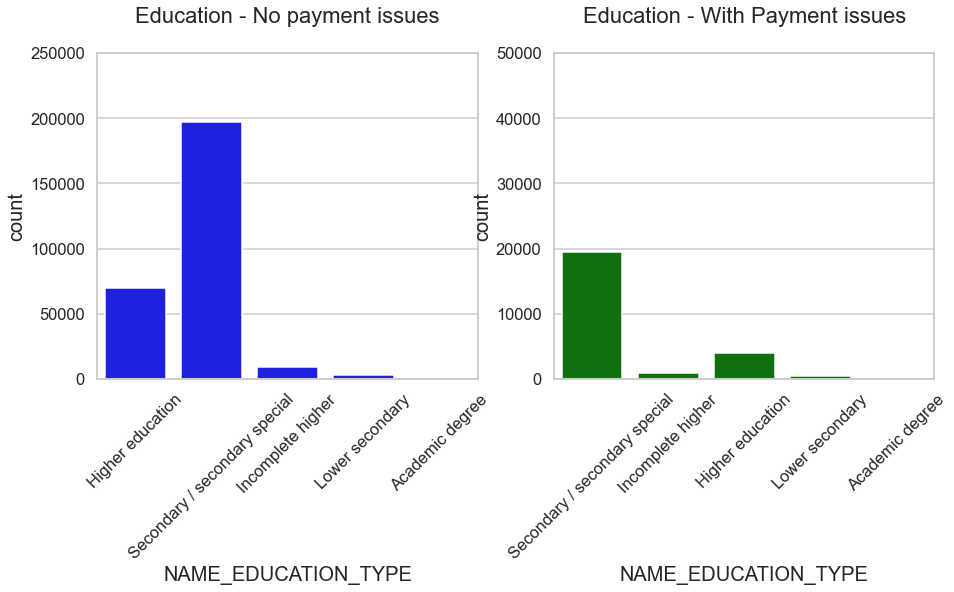

In [84]:
# For no payment issues

plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)


sns.countplot(target0['NAME_EDUCATION_TYPE'],color="blue")
plt.title('Education - No payment issues')
plt.ylim(0,250000)
plt.xticks(rotation = 45)

# For payment issues
plt.subplot(1, 2, 2)

sns.countplot(target1['NAME_EDUCATION_TYPE'],color="green")
plt.title('Education - With Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 45)
plt.show()

#### Conclusion - People most likely to repay te loan have secondary/Secondary special education status whereas clients having an academic degree are the most defaulters.

### Univariate Analysis - Continuous variables

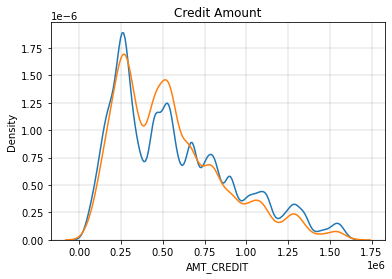

In [48]:
sns.distplot(target0['AMT_CREDIT'], hist = False, label="Success")
sns.distplot(target1['AMT_CREDIT'], hist = False, label="Fail")
plt.title('Credit Amount')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

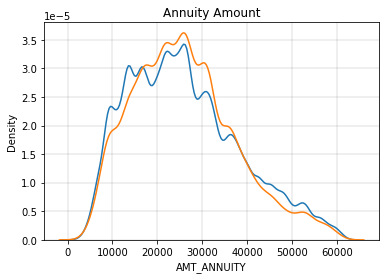

In [49]:
sns.distplot(target0['AMT_ANNUITY'], hist = False, label="Success")
sns.distplot(target1['AMT_ANNUITY'], hist = False, label="Fail")
plt.title('Annuity Amount')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

In [50]:
# to check correlation between all columns
cor=target0.corr()
cor

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.000759,0.002299,0.000027,0.001232,0.001383,0.001340,-0.000468,0.001244,-0.000034,-0.002911,-0.000823,-0.001154,0.000246,0.000740,0.002660,-0.002862,-0.001738,0.000355,0.001831,0.000322,-0.001795,-0.002079,0.002331,-0.000120,0.000774,0.003396
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.000759,NaN,1.000000,0.030072,0.002239,0.023862,0.001279,-0.350548,-0.058536,-0.181896,0.024605,0.855271,0.019782,0.018267,-0.010753,0.013726,0.019705,0.024939,0.070449,0.066451,-0.010594,-0.036250,0.001912,0.001571,0.000649,-0.005164,-0.003752,-0.033485
AMT_INCOME_TOTAL,0.002299,NaN,0.030072,1.000000,0.352510,0.428797,0.339068,-0.092897,0.032652,-0.070705,-0.033713,0.032844,-0.182889,-0.200678,0.071516,0.149001,0.136868,0.020023,0.042996,0.042899,0.149429,-0.075636,0.005234,0.008600,0.013571,0.070548,0.037207,0.085743
AMT_CREDIT,0.000027,NaN,0.002239,0.352510,1.000000,0.772087,0.982455,0.049670,0.089059,-0.006357,-0.000040,0.063628,-0.077957,-0.085784,0.016917,0.040461,0.043444,-0.025352,-0.010943,0.008295,0.114345,0.023546,-0.001753,0.003734,0.000966,0.049836,0.024083,-0.013778
AMT_ANNUITY,0.001232,NaN,0.023862,0.428797,0.772087,1.000000,0.758636,-0.017293,0.051874,-0.038648,-0.019370,0.081523,-0.111815,-0.124322,0.034713,0.072962,0.070837,-0.002836,0.010440,0.019165,0.114550,0.008878,0.004295,0.003323,0.013447,0.037208,0.013682,0.007869
AMT_GOODS_PRICE,0.001383,NaN,0.001279,0.339068,0.982455,0.758636,1.000000,0.044326,0.086922,-0.006350,-0.001553,0.061371,-0.070027,-0.076289,0.016022,0.037152,0.039032,-0.025147,-0.009663,0.008830,0.109804,0.015186,-0.000617,0.005033,-0.000641,0.047646,0.023332,-0.007298
DAYS_BIRTH,0.001340,NaN,-0.350548,-0.092897,0.049670,-0.017293,0.044326,1.000000,0.332959,0.327914,0.270233,-0.286638,-0.002470,-0.000866,-0.066426,-0.097839,-0.071440,-0.179689,-0.241976,-0.160115,0.077852,0.173801,-0.003123,-0.001635,0.003526,0.001794,0.015208,0.077402
DAYS_EMPLOYED,-0.000468,NaN,-0.058536,0.032652,0.089059,0.051874,0.086922,0.332959,1.000000,0.158445,0.074029,-0.021368,0.018715,0.016790,-0.057044,-0.082803,-0.063042,-0.112275,-0.124421,-0.072602,0.081965,0.110591,0.004335,-0.000461,0.002279,0.029909,0.001398,0.024522
DAYS_REGISTRATION,0.001244,NaN,-0.181896,-0.070705,-0.006357,-0.038648,-0.006350,0.327914,0.158445,1.000000,0.098170,-0.173666,-0.073949,-0.067433,-0.028851,-0.037235,-0.027742,-0.063821,-0.097305,-0.070621,0.052253,0.092117,0.003286,-0.000279,0.001148,0.011167,0.000317,0.021754


### BIVARIATE ANALYSIS

Numeric- Numeric variables

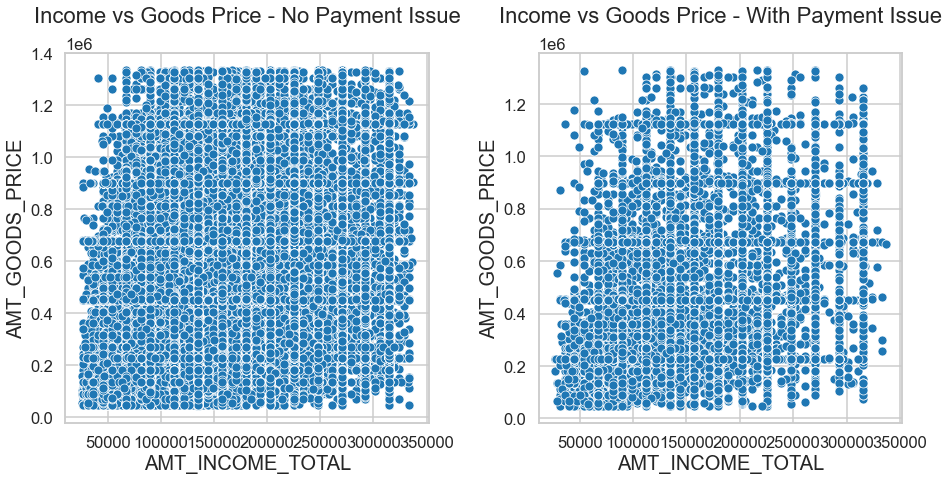

In [88]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(x= target0.AMT_INCOME_TOTAL, y=target0.AMT_GOODS_PRICE)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Income vs Goods Price - No Payment Issue')

plt.subplot(2,2,2)
sns.scatterplot(x= target1.AMT_INCOME_TOTAL,y=target1.AMT_GOODS_PRICE)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Income vs Goods Price - With Payment Issue')
plt.show()

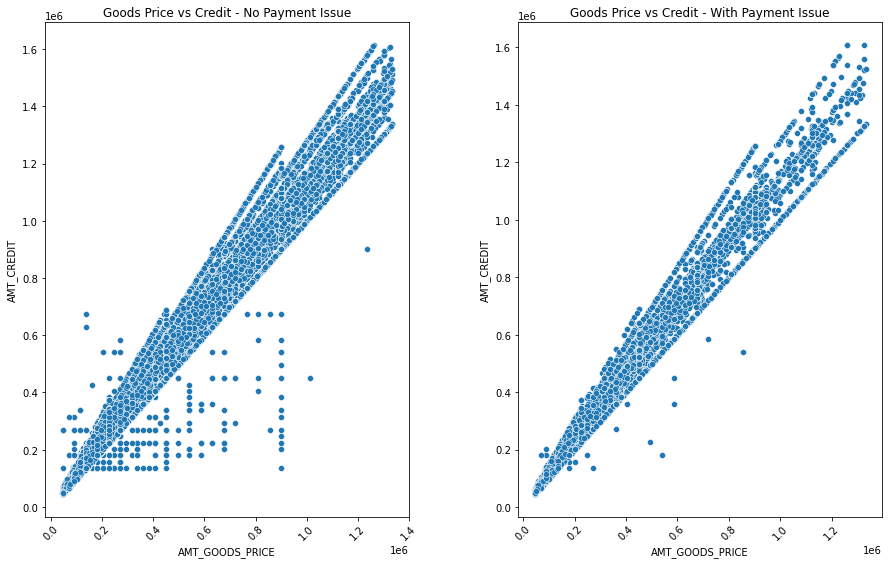

In [52]:
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,3)
sns.scatterplot(target0.AMT_GOODS_PRICE,target0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Goods Price vs Credit - No Payment Issue')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target1.AMT_GOODS_PRICE,target1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Goods Price vs Credit - With Payment Issue')
plt.xticks(rotation = 45)
plt.show()

##### Conclusion - Clients who have repayed the loan on time have a higher chance of getting the loan again for more expensive goods and also have a high probable opportunity to get credit for particular goods value.

####         
Numeric-Categorical

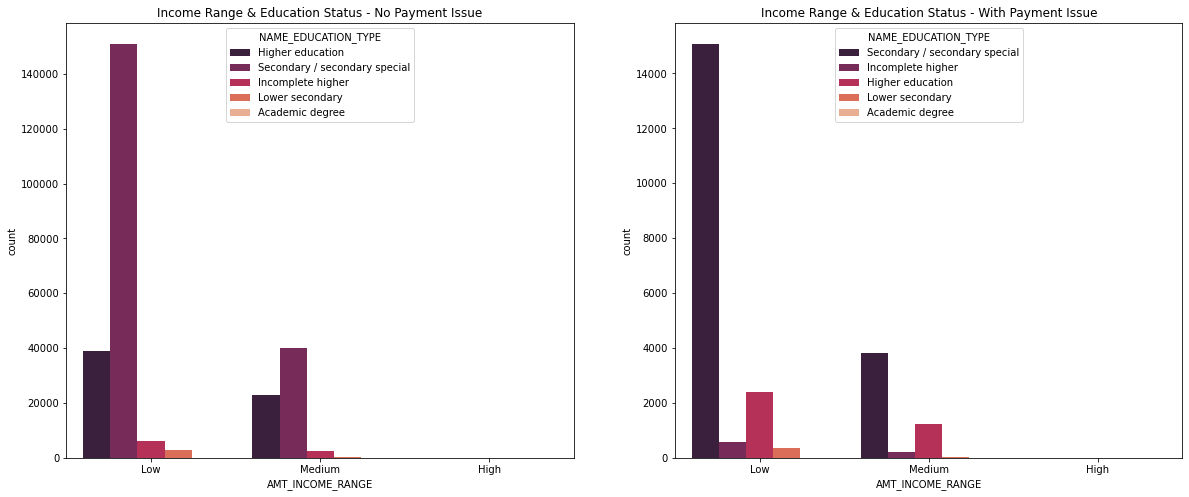

In [53]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.title('Income Range & Education Status - No Payment Issue')

sns.countplot(x='AMT_INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=target0, palette='rocket')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Income Range & Education Status - With Payment Issue')

sns.countplot(x='AMT_INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=target1,palette='rocket')
plt.show()

##### Conclusion - People most likely to repay the loan have secondary/Secondary special education status and a lower income range

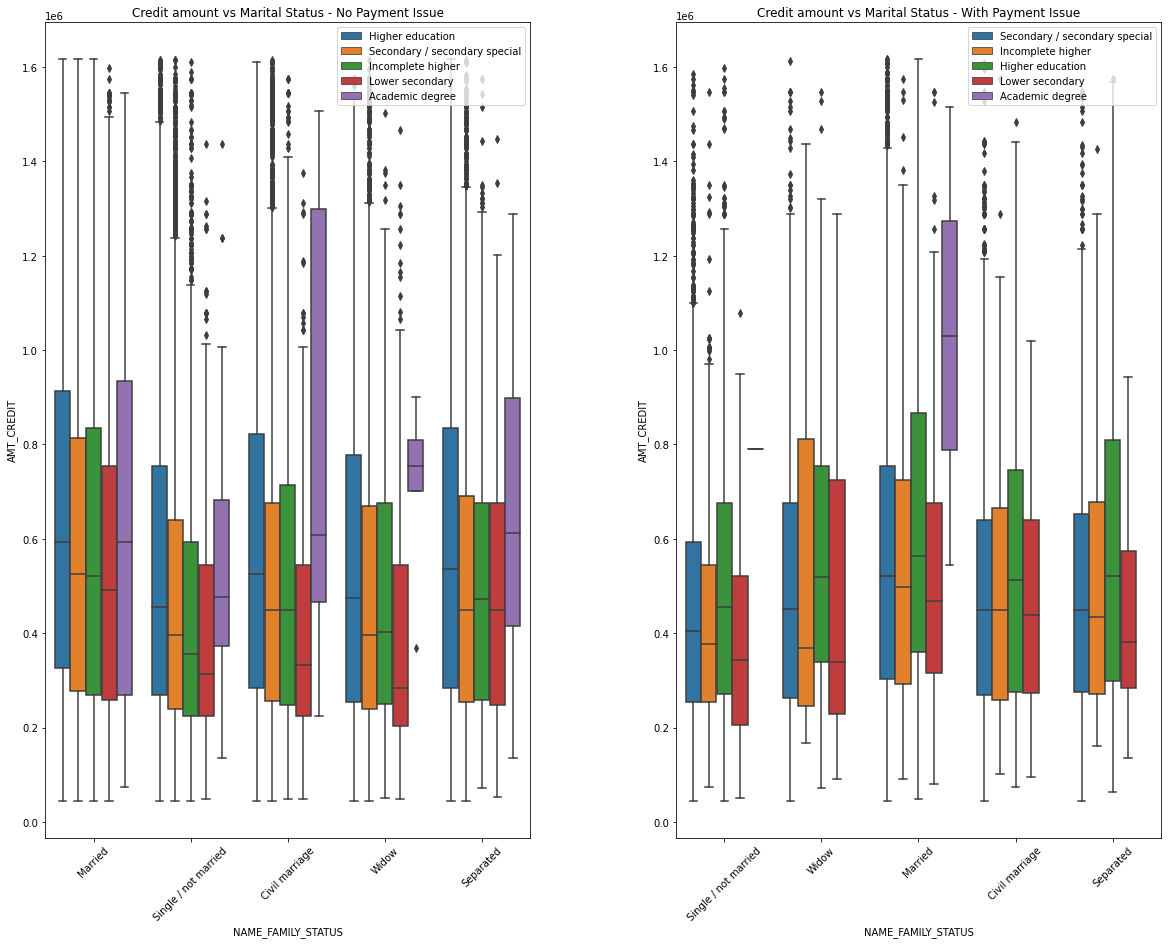

In [54]:
# Box plotting for Credit amount


plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.boxplot(data =target0, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - No Payment Issue')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.subplot(1,2,2)
sns.boxplot(data =target1, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - With Payment Issue')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

##### Conclusion - Married people with higher education get higher credit as compared to widows with low educations status

## Analysis of Previous applications data set

In [55]:
#read the previous_application data set
prev_app = pd.read_csv("previous_application.csv")
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# General sanity checks for the imported data set 
prev_app.shape

(1670214, 37)

In [57]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [58]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [59]:
#find the percentage of missing values in the data set
null_count=(prev_app.isnull().sum()/len(prev_app.index))*100
null_count

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [60]:
# droping the column which contains more than or equal to 40% missing value except NFLAG_INSURED_ON_APPROVAL
# As NFLAG_INSURED_ON_APPROVAL - is insurance asked by customer for loan process. which is a an importnt part in loan decision making

null_count = null_count[null_count>40] 
null_count =null_count.drop('NFLAG_INSURED_ON_APPROVAL')
print(null_count)
print(len(null_count))

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
dtype: float64
10


In [61]:
col_drop = (null_count.index)
Col_drop = list(col_drop)
prev_app.drop(labels=col_drop,axis=1,inplace=True)
prev_app.shape

(1670214, 27)

In [62]:
# droping some columns which are not important for this analysis
prev_app.drop(['DAYS_DECISION', 'SELLERPLACE_AREA','SK_ID_PREV','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'], axis=1 , inplace= True)
prev_app.shape

(1670214, 22)

In [63]:
#checking remaining null values in data set
prev_app.isnull().sum()/len(prev_app.index)*100

SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
NFLAG_INSURED_ON_APPROVAL      40.298129
dtype: float64

In [64]:
# missing values in the columns of AMT_CREDIT and PRODUCT_COMBINATION having percentage of less than 1%
# That's why dropping the rows which have missing values in  columns of AMT_CREDIT and PRODUCT_COMBINATION 
prev_app=prev_app[~(prev_app.AMT_CREDIT.isnull())]
prev_app=prev_app[~(prev_app.PRODUCT_COMBINATION.isnull())]
prev_app.shape

(1669867, 22)

In [65]:
# replacing missing value in columns of AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT
prev_app.AMT_ANNUITY = prev_app.AMT_ANNUITY.fillna(prev_app.AMT_ANNUITY.median())
prev_app.AMT_GOODS_PRICE = prev_app.AMT_GOODS_PRICE.fillna(prev_app.AMT_GOODS_PRICE.median())
prev_app.CNT_PAYMENT = prev_app.CNT_PAYMENT.fillna(prev_app.CNT_PAYMENT.median())
print(prev_app.AMT_ANNUITY.isnull().sum())
print(prev_app.AMT_GOODS_PRICE.isnull().sum())
print(prev_app.CNT_PAYMENT.isnull().sum())

0
0
0


In [66]:
# check the unique values in the dataset
for col in prev_app.columns:
    print(col, '####' , prev_app[col].unique())

SK_ID_CURR #### [271877 108129 122040 ... 253940 353284 191629]
NAME_CONTRACT_TYPE #### ['Consumer loans' 'Cash loans' 'Revolving loans']
AMT_ANNUITY #### [ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
AMT_APPLICATION #### [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
AMT_CREDIT #### [ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
AMT_GOODS_PRICE #### [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
FLAG_LAST_APPL_PER_CONTRACT #### ['Y' 'N']
NFLAG_LAST_APPL_IN_DAY #### [1 0]
NAME_CASH_LOAN_PURPOSE #### ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Re

In [67]:
# assume that XNA and XAP as null value, so replace that with NaN 
prev_app = prev_app.replace('XNA',np.NAN)
prev_app = prev_app.replace('XAP',np.NAN)

In [68]:
for col in prev_app.columns:
    print(col, '####' , prev_app[col].unique())
    

SK_ID_CURR #### [271877 108129 122040 ... 253940 353284 191629]
NAME_CONTRACT_TYPE #### ['Consumer loans' 'Cash loans' 'Revolving loans']
AMT_ANNUITY #### [ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
AMT_APPLICATION #### [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
AMT_CREDIT #### [ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
AMT_GOODS_PRICE #### [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
FLAG_LAST_APPL_PER_CONTRACT #### ['Y' 'N']
NFLAG_LAST_APPL_IN_DAY #### [1 0]
NAME_CASH_LOAN_PURPOSE #### [nan 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to

AMT_ANNUITY


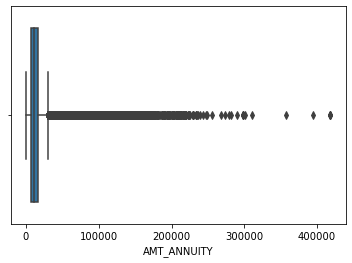

AMT_APPLICATION


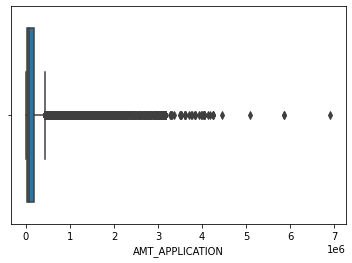

AMT_CREDIT


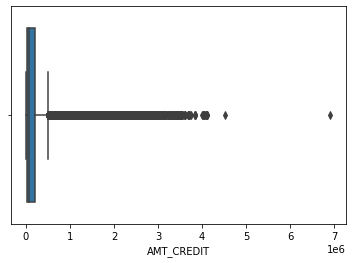

AMT_GOODS_PRICE


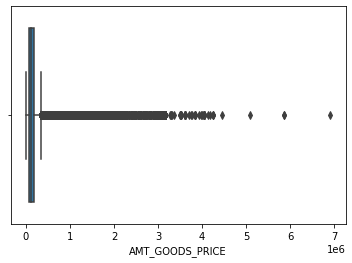

CNT_PAYMENT


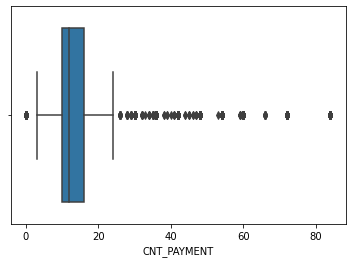

In [69]:
## plot the boxplot against all the numerical column to check the outlier
cont=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']

for i in cont:
    print(i)
    sns.boxplot(prev_app[i])
    plt.show()

### Handelling  of outliers using IQR method

In [70]:
q3, q1 = np.percentile(prev_app.AMT_ANNUITY, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
prev_app.AMT_ANNUITY = prev_app.AMT_ANNUITY[prev_app.AMT_ANNUITY < upper_bound]
prev_app.AMT_ANNUITY = prev_app.AMT_ANNUITY[prev_app.AMT_ANNUITY > lower_bound]

In [71]:
q3, q1 = np.percentile(prev_app.AMT_APPLICATION, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
prev_app.AMT_APPLICATION = prev_app.AMT_APPLICATION[prev_app.AMT_APPLICATION < upper_bound]
prev_app.AMT_APPLICATION = prev_app.AMT_APPLICATION[prev_app.AMT_APPLICATION > lower_bound]

In [72]:
q3, q1 = np.percentile(prev_app.AMT_CREDIT, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
prev_app.AMT_CREDIT = prev_app.AMT_CREDIT[prev_app.AMT_CREDIT < upper_bound]
prev_app.AMT_CREDIT = prev_app.AMT_CREDIT[prev_app.AMT_CREDIT > lower_bound]

In [73]:
q3, q1 = np.percentile(prev_app.AMT_GOODS_PRICE, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
prev_app.AMT_GOODS_PRICE = prev_app.AMT_GOODS_PRICE[prev_app.AMT_GOODS_PRICE < upper_bound]
prev_app.AMT_GOODS_PRICE = prev_app.AMT_GOODS_PRICE[prev_app.AMT_GOODS_PRICE > lower_bound]

In [74]:
q3, q1 = np.percentile(prev_app.CNT_PAYMENT, [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
prev_app.CNT_PAYMENT = prev_app.CNT_PAYMENT[prev_app.CNT_PAYMENT < upper_bound]
prev_app.CNT_PAYMENT = prev_app.CNT_PAYMENT[prev_app.CNT_PAYMENT > lower_bound]

In [75]:
prev_app[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
count,1.507311e+06,1.461853e+06,1.489863e+06,1.433841e+06,1.324952e+06
mean,1.146225e+04,8.466327e+04,1.044150e+05,1.090903e+05,1.227387e+01
std,6.247152e+03,9.166588e+04,1.167114e+05,6.744662e+04,4.971425e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,6.908985e+03,0.000000e+00,1.889100e+04,5.727600e+04,1.000000e+01
50%,1.125000e+04,5.483754e+04,6.475500e+04,1.123200e+05,1.200000e+01
75%,1.350000e+04,1.305000e+05,1.483650e+05,1.230480e+05,1.200000e+01
max,3.075215e+04,4.229010e+05,5.047515e+05,3.499740e+05,2.400000e+01


AMT_ANNUITY


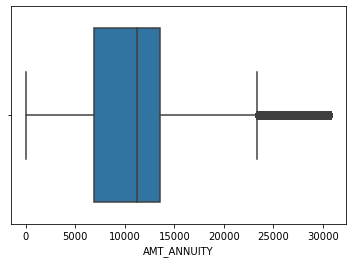

AMT_APPLICATION


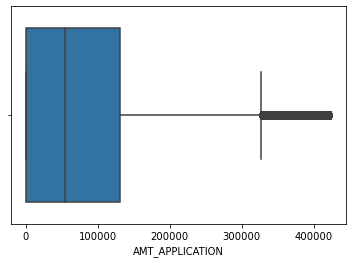

AMT_CREDIT


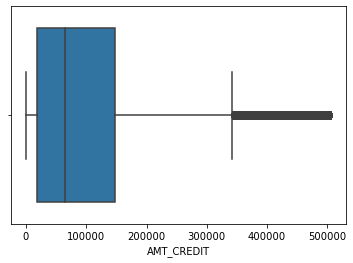

AMT_GOODS_PRICE


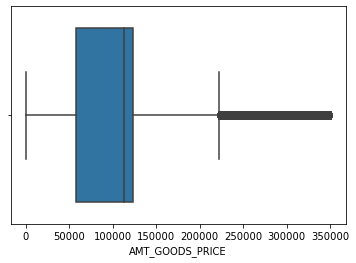

CNT_PAYMENT


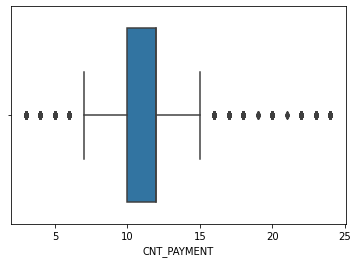

In [76]:
cont=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT' ]

for i in cont:
    print(i)
    sns.boxplot(prev_app[i])
    plt.show()

In [77]:
#Merge the previous application & application data file
merged_data= pd.merge(app_data, prev_app, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,637.0,3648.0,2120,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,Teen,Consumer loans,9251.775,179055.0,179055.0,179055.0,Y,1,NaN,Approved,NaN,NaN,New,Vehicles,POS,NaN,Stone,Auto technology,24.0,low_normal,POS other with interest,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Cash loans,NaN,NaN,NaN,NaN,Y,1,NaN,Approved,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,12.0,low_normal,Cash X-Sell: low,1.0
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Consumer loans,NaN,337500.0,348637.5,337500.0,Y,1,NaN,Approved,Cash through the bank,NaN,Refreshed,Furniture,POS,NaN,Stone,Furniture,6.0,middle,POS industry with interest,0.0
3,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Consumer loans,6737.310,68809.5,68053.5,68809.5,Y,1,NaN,Approved,Cash through the bank,NaN,Refreshed,Consumer Electronics,POS,NaN,Country-wide,Consumer electronics,12.0,middle,POS household with interest,1.0
4,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,225.0,4260.0,2531,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle Age,Consumer loans,5357.250,24282.0,20106.0,24282.0,Y,1,NaN,Approved,Cash through the bank,NaN,New,Mobile,POS,NaN,Regional / Local,Connectivity,4.0,middle,POS mobile without interest,0.0


In [78]:
#modification of columns names after merging

merged_data = merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICEx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,637.0,3648.0,2120,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,Teen,Consumer loans,9251.775,179055.0,179055.0,179055.0,Y,1,NaN,Approved,NaN,NaN,New,Vehicles,POS,NaN,Stone,Auto technology,24.0,low_normal,POS other with interest,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Cash loans,NaN,NaN,NaN,NaN,Y,1,NaN,Approved,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,12.0,low_normal,Cash X-Sell: low,1.0
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Consumer loans,NaN,337500.0,348637.5,337500.0,Y,1,NaN,Approved,Cash through the bank,NaN,Refreshed,Furniture,POS,NaN,Stone,Furniture,6.0,middle,POS industry with interest,0.0
3,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Consumer loans,6737.310,68809.5,68053.5,68809.5,Y,1,NaN,Approved,Cash through the bank,NaN,Refreshed,Consumer Electronics,POS,NaN,Country-wide,Consumer electronics,12.0,middle,POS household with interest,1.0
4,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,225.0,4260.0,2531,Laborers,1,2,2,MONDAY,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle Age,Consumer loans,5357.250,24282.0,20106.0,24282.0,Y,1,NaN,Approved,Cash through the bank,NaN,New,Mobile,POS,NaN,Regional / Local,Connectivity,4.0,middle,POS mobile without interest,0.0


In [79]:
merged_data.shape

(1404757, 63)

In [80]:
#eliminating Unwanted columns

merged_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
merged_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICEx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,637.0,3648.0,2120,Laborers,1,2,2,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,Teen,Consumer loans,9251.775,179055.0,179055.0,179055.0,NaN,Approved,NaN,NaN,New,Vehicles,POS,NaN,Stone,Auto technology,24.0,low_normal,POS other with interest,0.0
1,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Cash loans,NaN,NaN,NaN,NaN,NaN,Approved,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,12.0,low_normal,Cash X-Sell: low,1.0
2,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Consumer loans,NaN,337500.0,348637.5,337500.0,NaN,Approved,Cash through the bank,NaN,Refreshed,Furniture,POS,NaN,Stone,Furniture,6.0,middle,POS industry with interest,0.0
3,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291,Core staff,2,1,1,School,0.622246,0.510768,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age,Consumer loans,6737.310,68809.5,68053.5,68809.5,NaN,Approved,Cash through the bank,NaN,Refreshed,Consumer Electronics,POS,NaN,Country-wide,Consumer electronics,12.0,middle,POS household with interest,1.0
4,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,225.0,4260.0,2531,Laborers,1,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle Age,Consumer loans,5357.250,24282.0,20106.0,24282.0,NaN,Approved,Cash through the bank,NaN,New,Mobile,POS,NaN,Regional / Local,Connectivity,4.0,middle,POS mobile without interest,0.0


### UNIVARIATE ANALYSIS

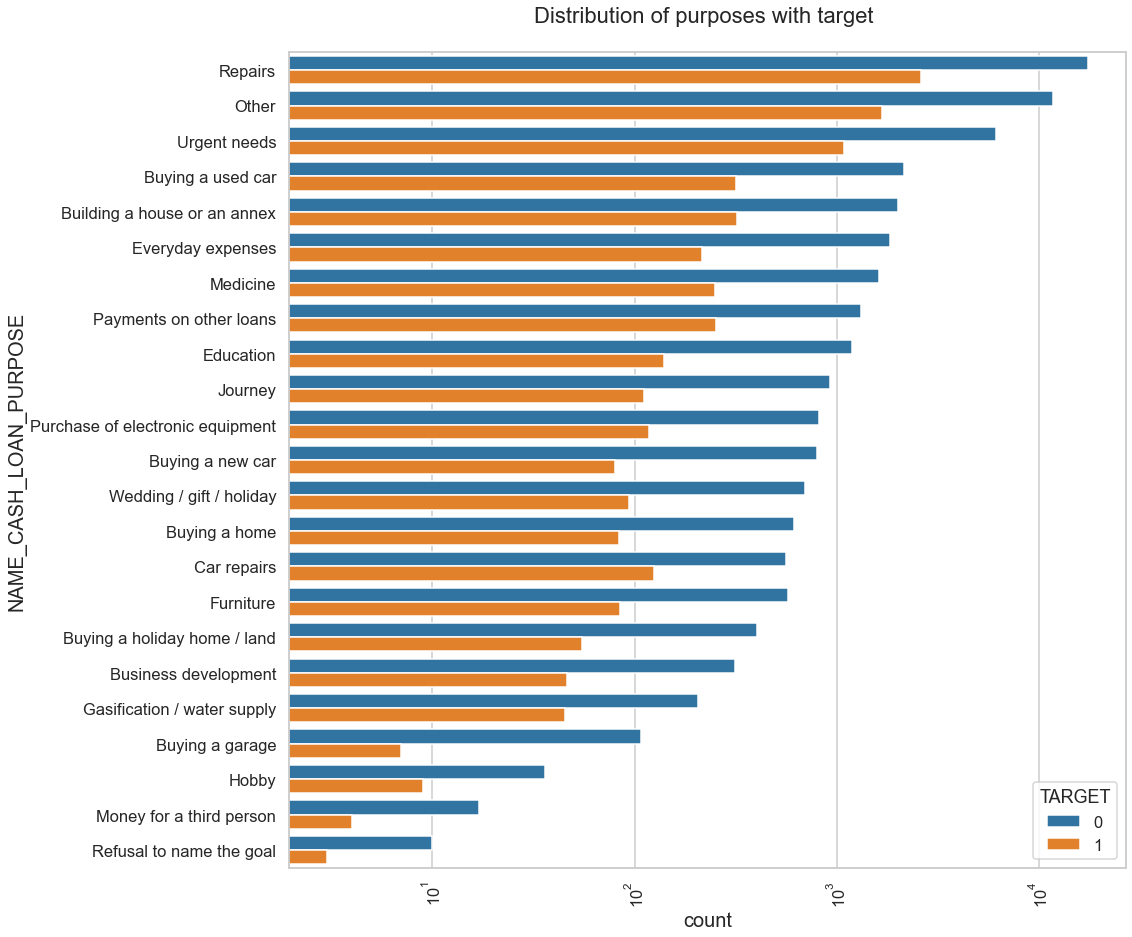

In [89]:
# Distribution of contract status
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

#### Conclusion - Categories like 'Buying a garage', 'Money for a third person', etc are the categories who have a high chance of successful loan repayment and should be prioritized. 

### BIVARIATE ANALYSIS

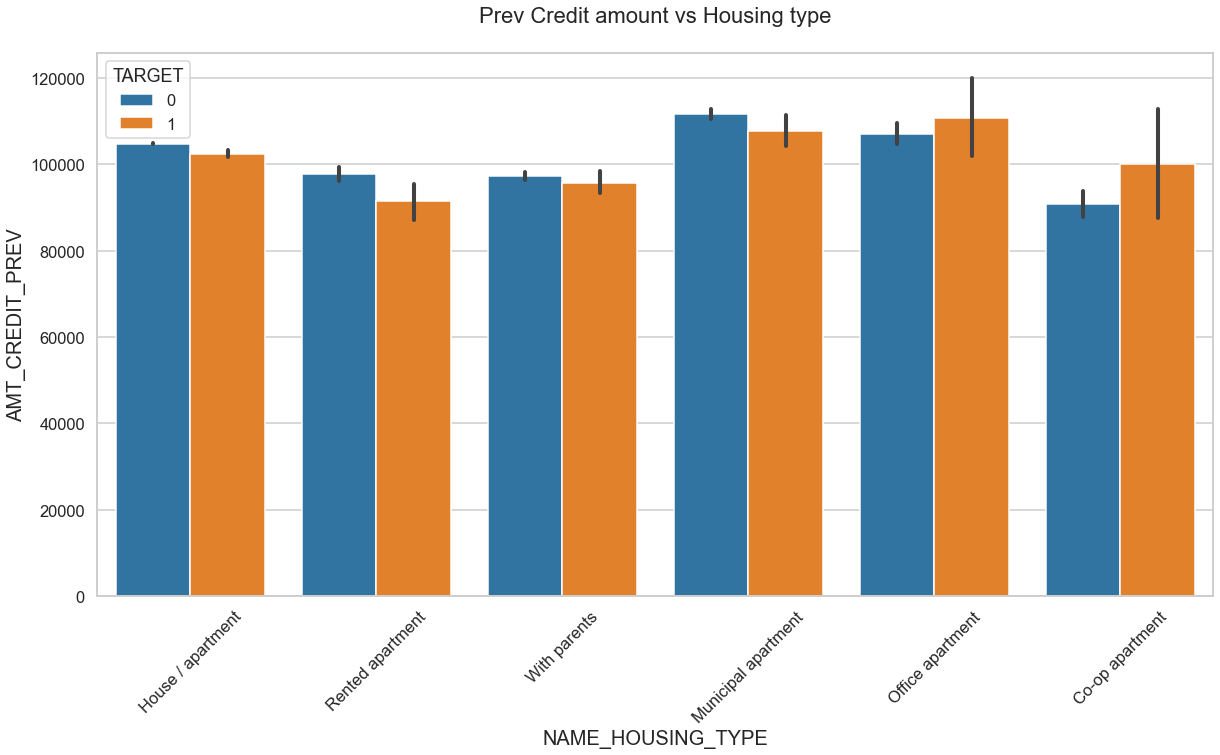

In [82]:
#Box plotting for Credit amount prev v/s Housing type

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(data =merged_data, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

When it comes to the ease of payment, "office apartment" category has the higher credit as compared to others. Also, bank should be careful while approving loans for 'co-op apartment' categories.

### Conclusion

1) People taking credit for commodities like new car or new garage are beneficial as they are loyal customers and pay back religiously.

2) Bank needs to be careful while giving away loans to widows in comparison of married people as they have a high chance of paying back. 

3) Customers who have low credit amount are more likely to payback, Hence bank should focus more on small loan amounts. 

4) People with high education status are more likely to pay back as compared to people with lower education.